## Identifying Phishing Email Theme using Unsupervised Machine Learning Techniques

Phishing emails are a type of online scam where criminals send an email that appears to be from a legitimate company and ask you to provide sensitive information. This is usually done by including a link that will appear to take you to the company’s website to fill in your information – but the website is a clever fake and the information you provide goes straight to the person behind the scam. 

In this research paper, unsupervised machine learning and the K-means Clustering technique is applied to identify the theme of phishing on a phishing-email dataset which is scraped from various sources spanning from 2010 till 2019.  

Unsupervised machine learning uncovers previously unknown patterns in data and is best applied when there is no data on desired outcomes or for problems that the business has not seen before.  

K-means clustering is a popular unsupervised machine learning algorithm that groups similar data points together based on certain similarities to discover underlying patterns.  

##### This research paper will explain: 

The purpose of the study <br>
The analysis of the data set <br>
The process of cleaning the data <br>
Identification of a phishing theme using clustering <br>
Our conclusions <br>

##### Structure of the dataset

The dataset consists of 26 columns and around 9k rows. Here are the first 5 columns of the dataset. 

In [60]:
# Importing the required Libraries.
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Libraries for NLP task
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Libraries from SK Learn
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from sklearn import decomposition

In [61]:
# Reading the Data set
df3 = pd.read_excel('phishing_clean.xlsx')

In [64]:
# Looking at the dataframe
df3.head()

,ID,Email Body,Links_in_body,Return-Path,X-Original-To,Delivered-To,Received,Message-ID,From,Reply-To,...,X-CS-IP,Status,X-Status,X-Keywords,X-UID,month,year,day,body,subject
0,0,Return-Path: \nX-Original-To: username@domain....,"['spanky.domain.com', 'http://cgi1.ebay.com/aw...",NaN,username@domain.com,username@domain.com,from 81.18.87.130 (unknown [81.18.87.190])\n\t...,NaN,"""aw-confirm@ebay.com""","""aw-confirm@ebay.com""",...,224.248.218.116,O,NaN,NaN,1.0,11.0,2004.0,6.0,\n\n\n\nDear valued\neBay member:\n\nWe recent...,Billing Issues
1,1,Return-Path: \nX-Original-To: username@domain....,"['mail2.domain.com', 'mail2.domain.com', '192....",NaN,username@domain.com,username@domain.com,from mail2.domain.com (mail2.domain.com [192.1...,<20041127192251.E0F57187C61@mail2.domain.com>,"""Instant On-Line Alert""",info@info-mrktng.com,...,NaN,RO,NaN,NaN,2.0,11.0,2004.0,5.0,\n\n\nUntitled Document\n\n\n\n\n\n\n\n\nFLASH...,Homeland Security Co AIMT signs Critical U.S. ...
2,2,Return-Path: \nX-Original-To: username@domain....,"['smf-camp8.smf.ebay.com', 'smfcamppool08.emai...",NaN,username@domain.com,username@domain.com,from smf-camp8.smf.ebay.com (smfcamppool08.ema...,<1101659380431.eBay.705443.53897.0@reply3.ebay...,"""eBay""",eBay.705443.53897.0@reply3.ebay.com,...,NaN,O,NaN,NaN,3.0,11.0,2004.0,6.0,eBay --> http://click3.ebay.com/705443.53897.0...,Shop the easy way! Find something for everyone...
3,3,Return-Path: \nX-Original-To: username@domain....,"['mail2.domain.com', 'mail2.domain.com', '192....",NaN,username@domain.com,username@domain.com,from mail2.domain.com (mail2.domain.com [192.1...,<000301c4d5ae$9231cea0$4553594d@myselves>,exchange-robot@paypal.com,NaN,...,NaN,RO,NaN,NaN,4.0,11.0,2004.0,0.0,\n\n \nCongratulations! PayPal has successfull...,Confirmation
4,4,Return-Path: \nX-Original-To: username@domain....,"['mail2.domain.com', 'mail2.domain.com', '192....",NaN,username@domain.com,username@domain.com,from mail2.domain.com (mail2.domain.com [192.1...,NaN,"""eBay.com""","""eBay.com""",...,NaN,RO,NaN,NaN,5.0,11.0,2004.0,6.0,\nMy eBay\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,WARNING-IFRAME-Your account at eBay has been s...


# Purpose of the Study 

The goal of this study was to learn how phishing techniques and themes have changed over the years, and how phishing emails are distributed over year, month and day of the week.  

In [66]:
# Dropping the unnamed column
df3.drop('Unnamed: 0.1', axis = 1, inplace = True)
# Dropping the unnamed column
df3.drop('Unnamed: 0', axis = 1, inplace = True)

# Analysis of the Dataset

First, we analyze the phishing email dataset to see the distribution of Phishing emails according to 

1. Year 
2. Month 
3. Day of the Week 

In [67]:
def plot_graph(type_, from_, to):
    indics = (df3[type_] > from_) & (df3[type_] <= to)
    plt.figure(figsize = (10, 6))
    fig = df3.loc[indics].groupby(type_)[type_].count().plot()
    get_numbers(type_, indics)

In [68]:
def get_numbers(type_, indics):
    print(df3.loc[indics].groupby(type_)[type_].count())
    print()

##### By Year

From this graph, we can see the distribution of phishing emails according to year. We can see that most of the phishing emails present in that dataset are from 2010, 2011 and 2015. We were not able to collect a lot of emails for the year 2018 and 2019 so going forward to make the dataset more balanced, data from 2018 and 2019 will be combined and represented as one. 

year
2009.0    303
2010.0    586
2011.0    434
2012.0    320
2013.0    263
2014.0    216
2015.0    444
2016.0    375
2017.0    233
2018.0    183
2019.0    117
Name: year, dtype: int64



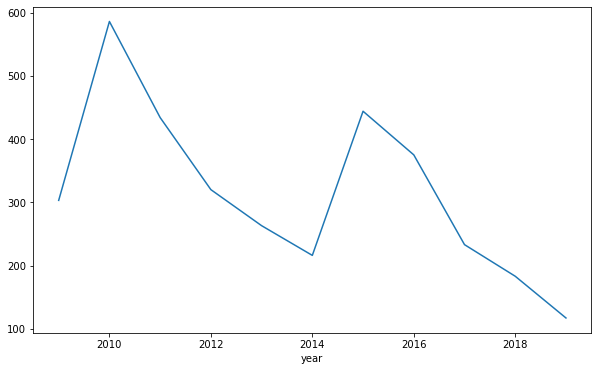

In [69]:
plot_graph('year', 2008, 2020)

Based on our dataset, after the initial spike of phishing emails in 2010, there was a significant decrease, likely because security professionals had become familiar and started developing techniques to block suspect emails. As attackers developed new and unique methods of phishing, there was another increase, but again a decrease as security professionals become familiar with the techniques.

##### By month

From the analysis we can see that phishing-email scam was very active during Feb, Mar, June and Aug but drastically reduced during November and December. Though the reason is unknown, we suspect this may be due to the holiday season between November and December.  

month
1.0     673
2.0     737
3.0     821
4.0     667
5.0     767
6.0     835
7.0     726
8.0     828
9.0     738
10.0    781
11.0    613
12.0    564
Name: month, dtype: int64



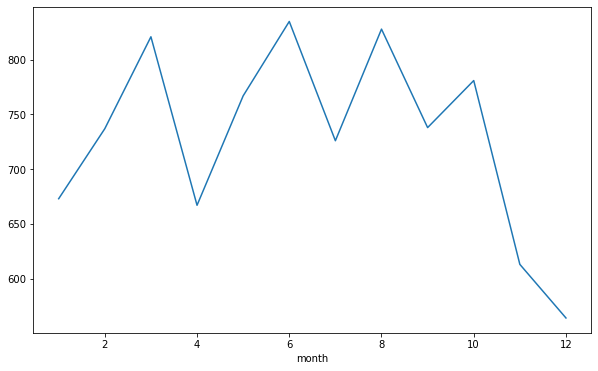

In [70]:
plot_graph('month', 0, 12)

##### Day of the week

From the analysis we can also see that the phishing emails are mostly active throughout the week but drastically reduced during weekends. 

day
0.0    1296
1.0    1287
2.0    1309
3.0    1300
4.0    1142
5.0     988
6.0     866
Name: day, dtype: int64



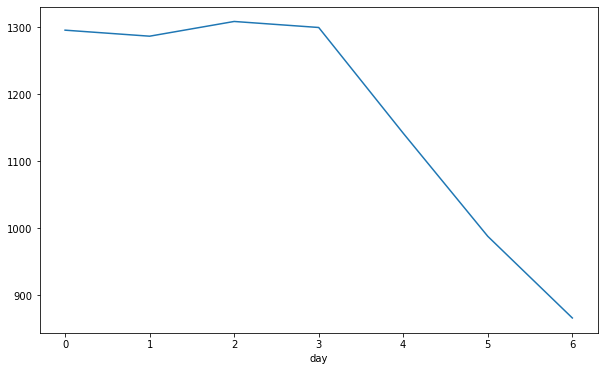

In [134]:
plot_graph('day', -1, 12)

This could be because attackers may suspect that people don’t read email as often on the weekends and may be lost in the inbox as the week starts.

In [100]:
stoplist = set(stopwords.words('english'))

f = open("stopWords.txt", "r")
words = f.read()
add_words = words.split(',')

stoplist = stoplist.union(add_words)

In [101]:
# Removing stop words and common words

stoplist = set(stopwords.words('english'))

f = open("stopWords.txt", "r")
words = f.read()
add_words = words.split(',')

stoplist = stoplist.union(add_words)

# Data Cleaning

Data cleaning is one of the most important tasks that needs to be performed before applying a machine learning algorithm. 

Data cleaning is also important because it improves data quality and in doing so, it increases overall productivity. When data is cleaned, all outdated or incorrect information is removed which leaves us with the highest quality information, assuring a better and more accurate output.  

Since we are working primarily with text data, some of the tasks involved in cleaning are removing Stop words, converting the entire text to lowercase, and removing punctuations and special characters. 

When cleaning the dataset, stop words need to be removed from the dataset because they don’t help us to find the context or the true meaning of a sentence. These are words that can be removed without any negative consequences to the final model that we are training. We define custom Stop words by taking some of the repeated words specific to this dataset which doesn't make much difference to the model and adding those to nltk's Stop words. 

In [74]:
## Dropping null values
df3 = df3[df3['body'].notna()]
df3 = df3[df3['subject'].notna()]

In [75]:
escape = ''.join([chr(char) for char in range(1, 32)])
translator = str.maketrans('', '', escape)
corpus = []
def clean_content_(df):
    clean_content = []
    
    for sent in (df):
        try:
            # url = data[0]
            html = sent
            soup = BeautifulSoup(html)

            # kill all script and style elements
            for script in soup(["script", "style"]):
                script.extract()    # rip it out

            # get text
            text = soup.get_text()

            # break into lines and remove leading and trailing space on each
            lines = (line.strip() for line in text.splitlines())
            # break multi-headlines into a line each
            chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
            # drop blank lines
            text = '\n'.join(chunk for chunk in chunks if chunk)
            words = text.translate(translator)
            words = words.lower()
            corpus.append(words)
            clean_content.append(words)
        except e:
            print(e)
            clean_content.append(df)
    return clean_content

In [99]:
data = clean_content_(df3['body']+" "+df3['subject'])

In [77]:
df3['cleaned'] = data

##### Word Cloud

Word clouds act as an alternative for analyzing text data and it is also much faster than coding. Essentially, word clouds generators work by breaking the text down into component words and counting how frequently they appear in the body of the text. 

We run the word cloud to quickly find some of the most common words in the dataset. We can see that lot of emails in our dataset contains “Paypal”, “ebay” along with “congratulations” so we can assume that they might be gift card themed phishing attacks. We can also associate security related phishing attacks such as links to change your password as we can see frequent references to words such as user and security. 

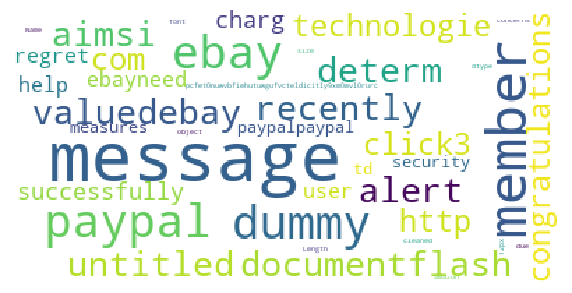

In [173]:
wordcloud = WordCloud(
                    background_color = "white",
                    stopwords = stoplist,
                    max_words = 100,
                    max_font_size = 50).generate(str(df3['cleaned']))

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [79]:
df3_2019 = df3[df3['year'] > 2016]
df3_2010 = df3[df3['year'] == 2010]

# Clustering to find out theme of the attacks.

Clustering is the process of grouping similar contents to determine the theme of the attacks. We apply clustering to group phishing-emails into categories and check if we can associate or draw conclusions to any type of phishing attacks from the words present in the clusters. 

Prior to clustering, we start by applying the Elbow method to identify the number of clusters(K) and then perform K-means clustering on the dataset. 

We have divided the dataset based on years to find the common theme in those particular years. In this research paper, the primary aim is to find the theme of phishing emails and check if there has been any change between the year 2010 and 2017 and later. 

In [80]:
def vectorize(df):
    data = df['cleaned']

    tf_idf_vectorizor = TfidfVectorizer(stop_words = stoplist, max_features = 5000)

    tf_idf = tf_idf_vectorizor.fit_transform(data)
    tf_idf_norm = normalize(tf_idf)
    tf_idf_array = tf_idf_norm.toarray()
    return tf_idf_array, tf_idf_vectorizor

##### 2010

As mentioned above, we start by finding the optimal number of clusters using the Elbow method and then use this to perform clustering. 

From the results of the Elbow method graph below we can see that there is a steep slope at 3 (on X-axis), so we consider the number of clusters to be 3 while applying K-means clustering. 

##### Data Analysis on 2010

##### According to Month
Given that there was a high number of phishing attacks in 2010, we explored the number of phishing emails that were reported in 2010 based on months. We can see that the highest number of phishing emails reported were in Oct and Nov. There was also a small spike in May and June as well.    

In [102]:
def plot_graph_2010(type_, from_, to):
    indics = (df3_2010[type_] > from_) & (df3_2010[type_] <= to)
    plt.figure(figsize = (10, 6))
    fig = df3_2010.loc[indics].groupby(type_)[type_].count().plot()
    get_numbers_2010(type_, indics)
    
def get_numbers_2010(type_, indics):
    print(df3_2010.loc[indics].groupby(type_)[type_].count())
    print()

month
1.0     15
2.0     32
3.0     25
4.0     33
5.0     58
6.0     55
7.0     39
8.0     39
9.0     28
10.0    94
11.0    66
12.0    33
Name: month, dtype: int64



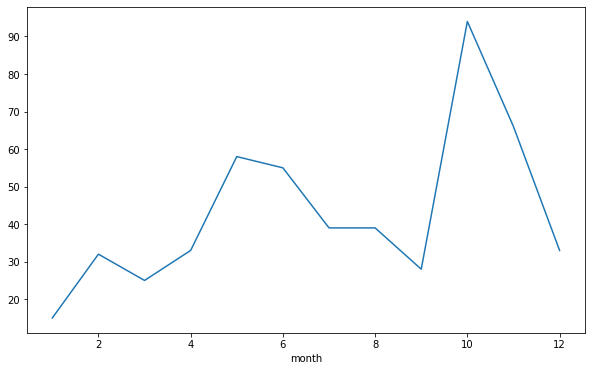

In [103]:
plot_graph_2010('month', 0, 12)

Given that there was a high number of phishing attacks in 2010, we explored the number of phishing emails that were reported in 2010 based on months. We can see that the highest number of phishing emails reported were in Oct and Nov. There was also a small spike in May and June as well. 

##### According to Day of the week

We explore further to look at the number of phishing emails that were reported in 2010 based on day of the week. According to the data we collected, the attacks were more during the working days and significantly reduced during weekends. 

day
0.0    109
1.0     92
2.0     77
3.0     75
4.0     75
5.0     49
6.0     40
Name: day, dtype: int64



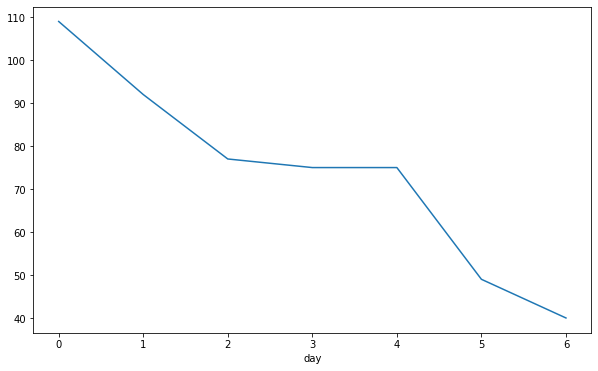

In [136]:
plot_graph_2010('day', -1, 12)

In [137]:
tf_idf_array, tf_idf_vectorizor = vectorize(df3_2010)

#### Elbow method

K-means clustering unsupervised machine learning algorithms group the data into a specified number of clusters, but it may not be the right number of clusters. The Elbow Method helps to determine if the person doing the analysis is using the right number of clusters. If the line chart looks like an arm, the “elbow” on the arm is the value that is the best.  

In [138]:
pca = PCA(n_components = 2)
Y_sklearn = pca.fit_transform(tf_idf_array)

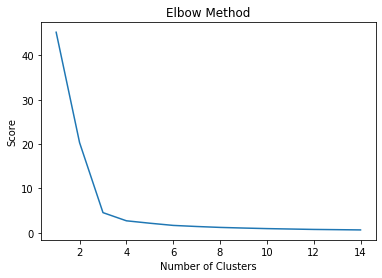

In [139]:
number_clusters = range(1, 15)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

This elbow method analysis was done to choose the right number of clusters. This analysis indicates that the current number of clusters to proceed is 3.  

##### Plotting Clusters

The graph below shows how the clusters are distributed with the black circle marking their centers.   

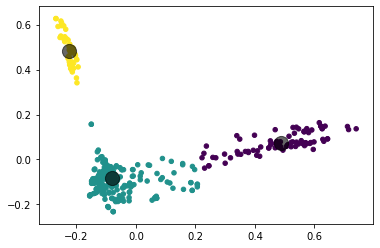

In [141]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, max_iter = 600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c = prediction, s = 20, cmap = 'viridis')
centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s = 200, alpha = 0.6)
plt.show()

Below we plot the top words belonging to each cluster and from these words we try to determine the theme of the phishing attack.  

From the plots below we can see that some of the phishing themes used in 2010 were related to email validation, tax, Paypal, payment related to tax or any items bought online, Government related like mails from Federal department, bank accounts etc. 

In [142]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['Theme', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 20)

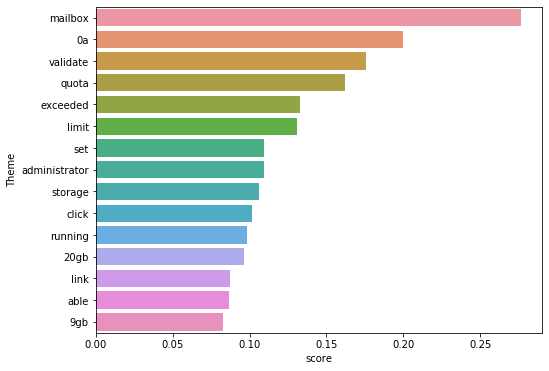

In [143]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'Theme', orient = 'h' , data = dfs[0][:15])
plt.show()

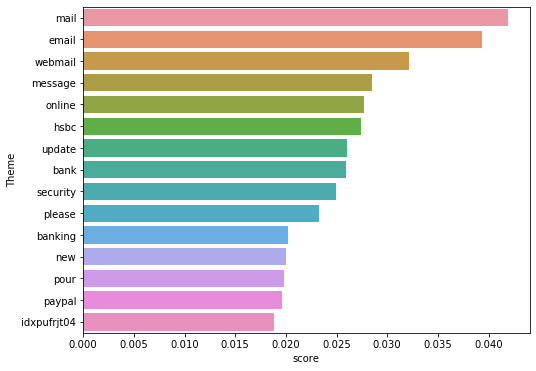

In [144]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'Theme', orient = 'h' , data = dfs[1][:15])
plt.show()

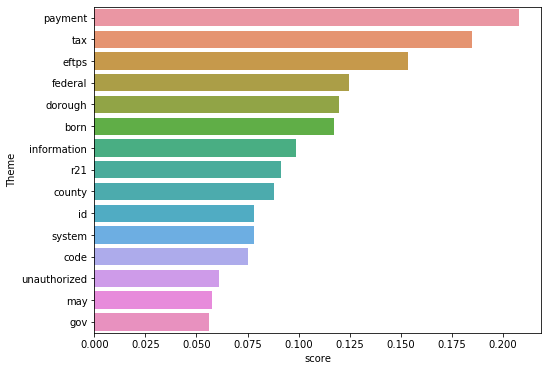

In [145]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'Theme', orient = 'h' , data = dfs[2][:15])
plt.show()

##### 2017 and later

We follow the exact same procedure we followed for 2010 phishing emails I.e., we get a number of clusters by plotting the elbow graph and then applying clustering and plot the top words in each cluster to see if we can determine the theme of phishing attack. 

##### EDA on 2017 and later

##### According to Month
Below is the number of phishing emails that were reported in 2017, 2018 and 2019 based on months. We can see that the highest number of phishing emails reported were in Feb, March, May and August. There was also a small spike in May and June as well.   

In [105]:
def plot_graph_2019(type_, from_, to):
    indics = (df3_2019[type_] > from_) & (df3_2019[type_] <= to)
    plt.figure(figsize = (10, 6))
    fig = df3_2019.loc[indics].groupby(type_)[type_].count().plot()
    get_numbers_2019(type_, indics)
    
def get_numbers_2019(type_, indics):
    print(df3_2019.loc[indics].groupby(type_)[type_].count())
    print()

month
1.0     50
2.0     67
3.0     51
4.0     36
5.0     60
6.0     37
7.0     26
8.0     50
9.0     44
10.0    31
11.0     9
12.0    23
Name: month, dtype: int64



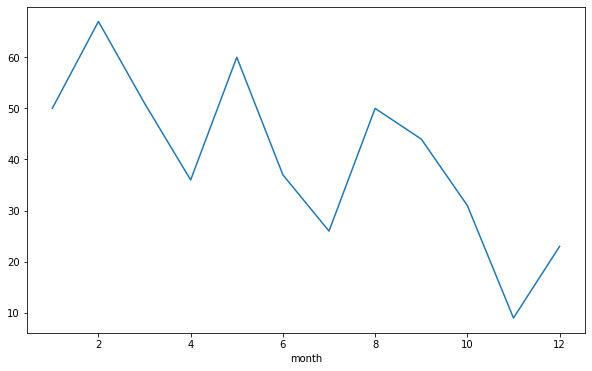

In [108]:
plot_graph_2019('month', 0, 12)

##### According to Day of the week

Below is the number of phishing emails that were reported in 2017, 2018 and 2019 based on day of the week. According to the data we collected, the attacks were consistent during the working days and significantly reduced on Saturday. One thing we can see is that the phishing attacks increased on Sunday which we had not seen in previous years. 

day
0.0    103
1.0     84
2.0     81
3.0     78
4.0     53
5.0     33
6.0     52
Name: day, dtype: int64



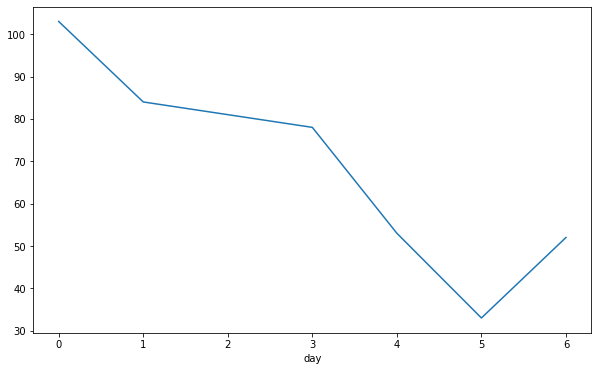

In [146]:
plot_graph_2019('day', -1, 12)

We noted that the phishing emails were reduced on weekends, suspecting that it is because people do not access their emails as often on weekends.  

In [155]:
tf_idf_array, tf_idf_vectorizor = vectorize(df3_2019)

#### Elbow method

In [156]:
pca = PCA(n_components = 2)
Y_sklearn = pca.fit_transform(tf_idf_array)

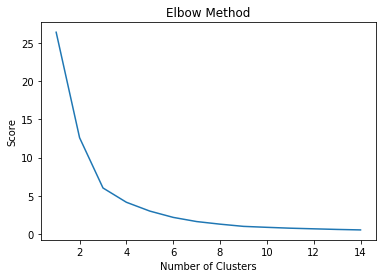

In [157]:
number_clusters = range(1, 15)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

#### Plotting the clusters

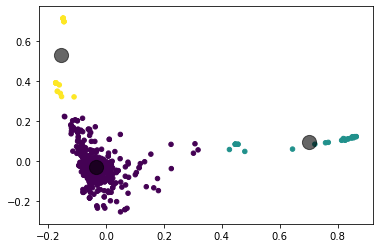

In [158]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, max_iter = 600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c = prediction, s = 20, cmap = 'viridis')
centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s = 200, alpha = 0.6)
plt.show()

In [159]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['Theme', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 20)

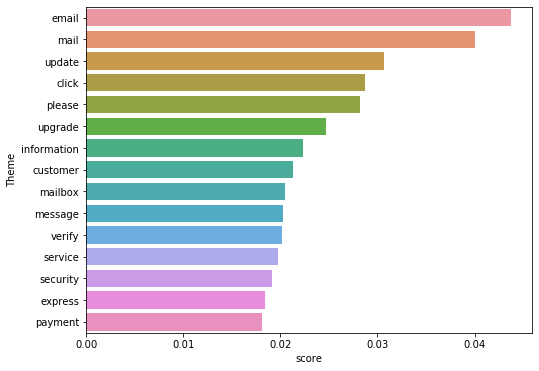

In [160]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'Theme', orient = 'h' , data = dfs[0][:15])
plt.show()

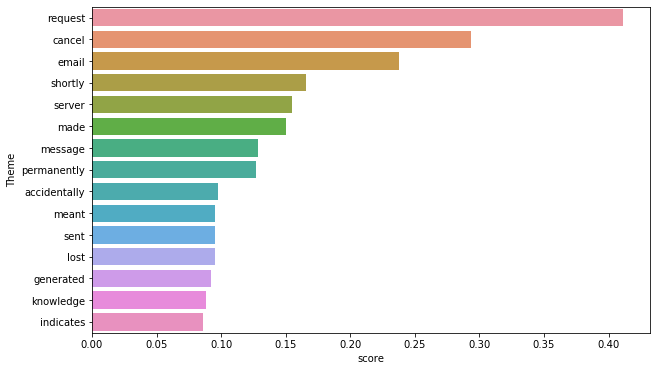

In [161]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'score' , y = 'Theme', orient = 'h' , data = dfs[1][:15])
plt.show()

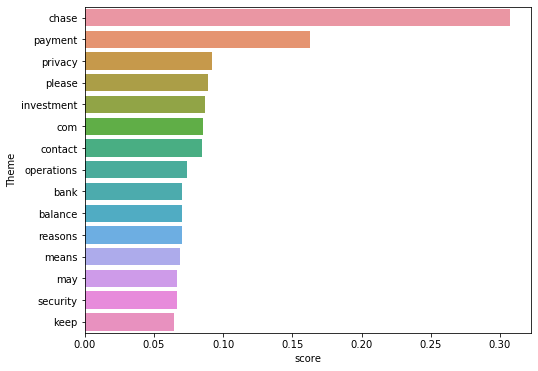

In [162]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'Theme', orient = 'h' , data = dfs[2][:15])
plt.show()

From the above plots we can see that some of the phishing themes used in the year 2017 and later were related to banks like Chase, mails related to verifying an account, security related phishing attacks etc. 

# Conclusion

From the above analysis we could find the overall theme of phishing attacks by applying unsupervised machine learning techniques and also comparing the phishing attack themes between years. Another advantage of this method is that we could easily find the theme of the phishing attack without even reading the entire mail using clustering techniques. This method also helps in analyzing how the theme of attack has changed over years as we can see from the above plots, some of the common phishing attacks in 2010 such as eBay and PayPal have drastically reduced over years. 

In [97]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')